In [1]:
import numpy as np 
import xarray as xr
from matplotlib import pyplot as plt
import os

%matplotlib inline

In [2]:
from ecco_read_utilities import *

In [3]:
ds_mon = open_ecco_variables('ADVx_SLT','ADVy_SLT','ADVr_SLT',
                             'DFxE_SLT','DFyE_SLT','DFrE_SLT','DFrI_SLT')

In [4]:
ds_ten = open_ecco_tendencies('Sad', 'Sdi')

### Volume of the grid cells

In [5]:
ds_mon['vol'] = ds_mon.RAC*ds_mon.DRF*ds_mon.hFacC

In [6]:
ds_ten['vol'] = ds_ten.area*ds_ten.thic*ds_ten.land

### Advective Flux of Salinity

**Note**:
- array.shift(i4=-1): shifts array 1 grid point to the left (along x)
- array.shift(i3=-1): shifts array 1 grid point downward (along y)
- array.shift(i2=1): shifts array 1 grid point deeper (along z)

In [7]:
# Divergence of horizontal advection (psu m^3/s)
div_adv_h = -(ds_mon.ADVx_SLT.shift(i4=-1) - ds_mon.ADVx_SLT + \
              ds_mon.ADVy_SLT.shift(i3=-1) - ds_mon.ADVy_SLT)

# Divergence of vertical advection (psu m^3/s)
div_adv_v =  -(ds_mon.ADVr_SLT.shift(i2=1) - ds_mon.ADVr_SLT)

In [8]:
div_adv_v = div_adv_v.shift(i2=-1)

In [9]:
div_adv = div_adv_h + div_adv_v

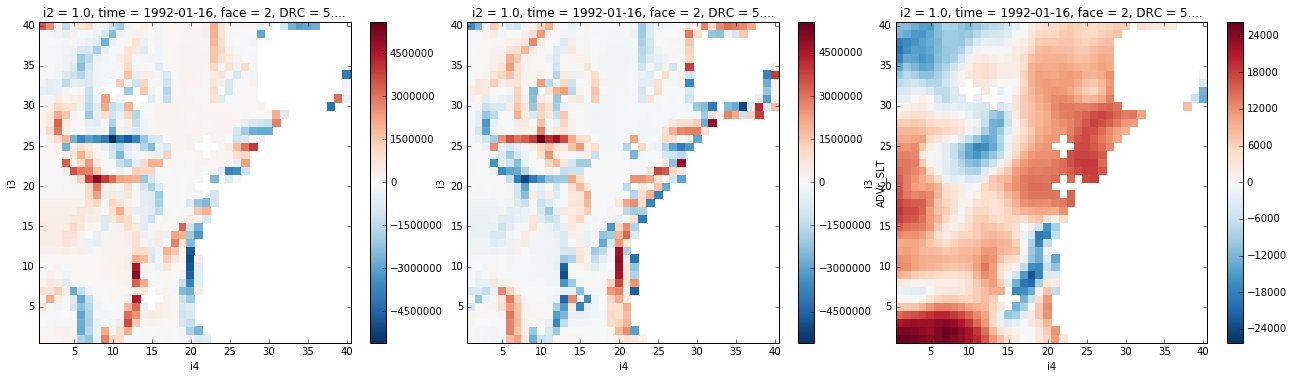

In [10]:
f, axes = plt.subplots(1, 3,figsize=(18,5))
f.tight_layout()

plt.subplot(1, 3, 1)
div_adv_h[0,2,0,:40,:40].plot()

plt.subplot(1, 3, 2)
div_adv_v[0,2,0,:40,:40].plot()

plt.subplot(1, 3, 3)
div_adv[0,2,0,:40,:40].plot()

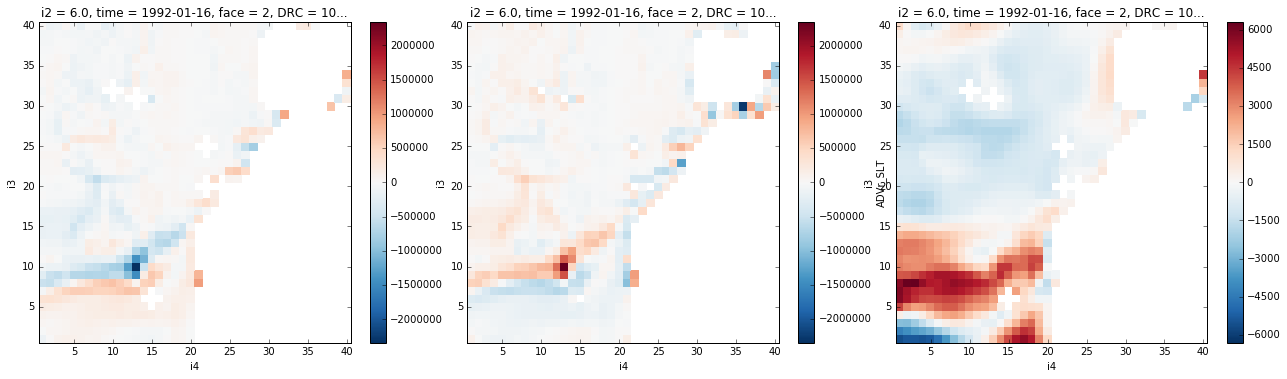

In [11]:
f, axes = plt.subplots(1, 3,figsize=(18,5))
f.tight_layout()

plt.subplot(1, 3, 1)
div_adv_h[0,2,5,:40,:40].plot()

plt.subplot(1, 3, 2)
div_adv_v[0,2,5,:40,:40].plot()

plt.subplot(1, 3, 3)
div_adv[0,2,5,:40,:40].plot()

### Diffusive Flux of Salinity

In [12]:
# Divergence of horizontal diffusion
div_diff_h = -(ds_mon.DFxE_SLT.shift(i4=-1) - ds_mon.DFxE_SLT + \
               ds_mon.DFyE_SLT.shift(i3=-1) - ds_mon.DFyE_SLT)

# Divergence of vertical diffusion
div_diff_v = -(ds_mon.DFrE_SLT.shift(i2=1) - ds_mon.DFrE_SLT + \
               ds_mon.DFrI_SLT.shift(i2=1) - ds_mon.DFrI_SLT)

In [13]:
div_diff_v = div_diff_v.shift(i2=-1)

In [14]:
div_diff = div_diff_h + div_diff_v

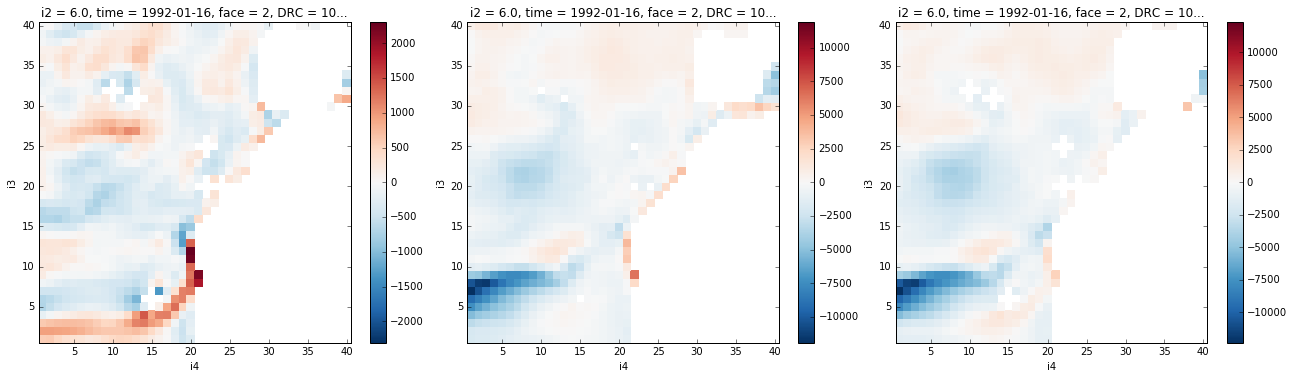

In [15]:
f, axes = plt.subplots(1, 3,figsize=(18,5))
f.tight_layout()

plt.subplot(1, 3, 1)
div_diff_h[0,2,5,:40,:40].plot()

plt.subplot(1, 3, 2)
div_diff_v[0,2,5,:40,:40].plot()

plt.subplot(1, 3, 3)
div_diff[0,2,5,:40,:40].plot()

### Compare to tendencies from snapshots
**Note**: Monthly fields of advection and diffusion are already volume weighted (psu m$^3$s$^{-1}$). To obtain tendency (psu s$^{-1}$) divide by total volume.

#### Plot tendencies for i2 = 1 (5 m)

/usr/local/anaconda/lib/python2.7/site-packages/dask/array/reductions.py:183: RuntimeWarning: invalid value encountered in divide
  pair['n'].sum(dtype=dtype, **kwargs), dtype=dtype)


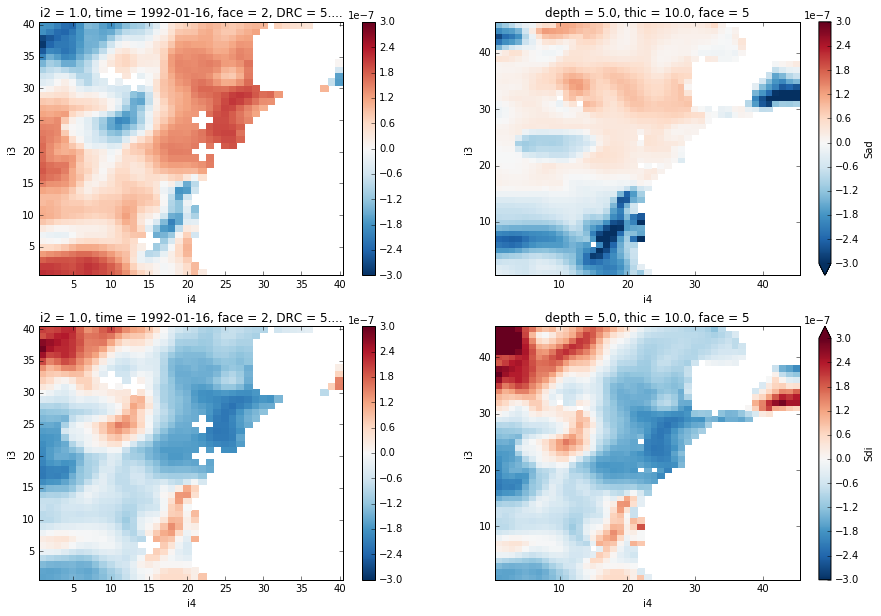

In [16]:
f, axes = plt.subplots(2, 2,figsize=(15,10))

plt.subplot(2, 2, 1)
(div_adv[0,2,0,:40,:40]/ds_mon.vol[2,:40,:40,0]).plot(vmax=3e-7)

plt.subplot(2, 2, 2)
ds_ten.Sad.sel(face=5,time=slice('1992-01-01','1992-01-31')).mean('time')[0].plot(vmax=3e-7)

plt.subplot(2, 2, 3)
(div_diff[0,2,0,:40,:40]/ds_mon.vol[2,:40,:40,0]).plot(vmax=3e-7)

plt.subplot(2, 2, 4)
ds_ten.Sdi.sel(face=5,time=slice('1992-01-01','1992-01-31')).mean('time')[0].plot(vmax=3e-7)

#### Plot tendencies for i2 = 6 (55 m)

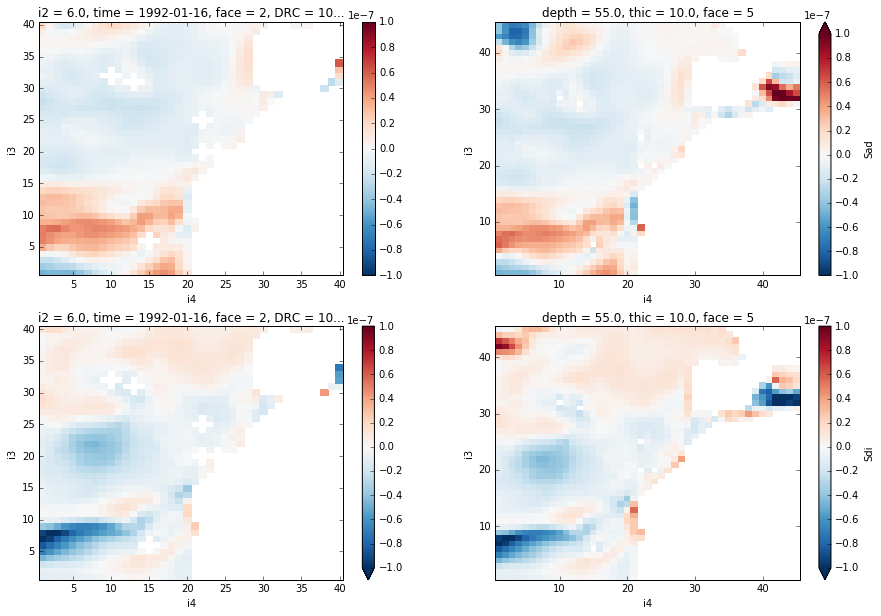

In [17]:
f, axes = plt.subplots(2, 2,figsize=(15,10))

plt.subplot(2, 2, 1)
(div_adv[0,2,5,:40,:40]/ds_mon.vol[2,:40,:40,5]).plot(vmax=1e-7)

plt.subplot(2, 2, 2)
ds_ten.Sad.sel(face=5,time=slice('1992-01-01','1992-01-31')).mean('time')[5].plot(vmax=1e-7)

plt.subplot(2, 2, 3)
(div_diff[0,2,5,:40,:40]/ds_mon.vol[2,:40,:40,5]).plot(vmax=1e-7)

plt.subplot(2, 2, 4)
ds_ten.Sdi.sel(face=5,time=slice('1992-01-01','1992-01-31')).mean('time')[5].plot(vmax=1e-7)

### Spatial distributions in the North Atlantic

In [18]:
tstart = '2008-06-01'
tend = '2008-10-31'

upper = 0
lower = 20

#### Tendencies

In [19]:
vol_ten = ds_ten.vol.sel(depth=slice(upper,lower))

In [20]:
Sad_ten = (ds_ten.Sad.sel(time=slice(tstart,tend),
                          depth=slice(upper,lower)).mean('time')*vol_ten).sum('depth',skipna=False)\
            /vol_ten.sum('depth',skipna=False)

Sdi_ten = (ds_ten.Sdi.sel(time=slice(tstart,tend),
                          depth=slice(upper,lower)).mean('time')*vol_ten).sum('depth',skipna=False)\
            /vol_ten.sum('depth',skipna=False)

#### Monthly fields

In [21]:
Sad_mon = div_adv.sel(time=slice(tstart,tend),i2=slice(1,2)).sum('i2')/ds_mon.vol.sel(i2=slice(1,2)).sum('i2')
Sdi_mon = div_diff.sel(time=slice(tstart,tend),i2=slice(1,2)).sum('i2')/ds_mon.vol.sel(i2=slice(1,2)).sum('i2')

#### Comparison plot

/usr/local/anaconda/lib/python2.7/site-packages/dask/async.py:249: RuntimeWarning: invalid value encountered in divide
  return func(*args2)


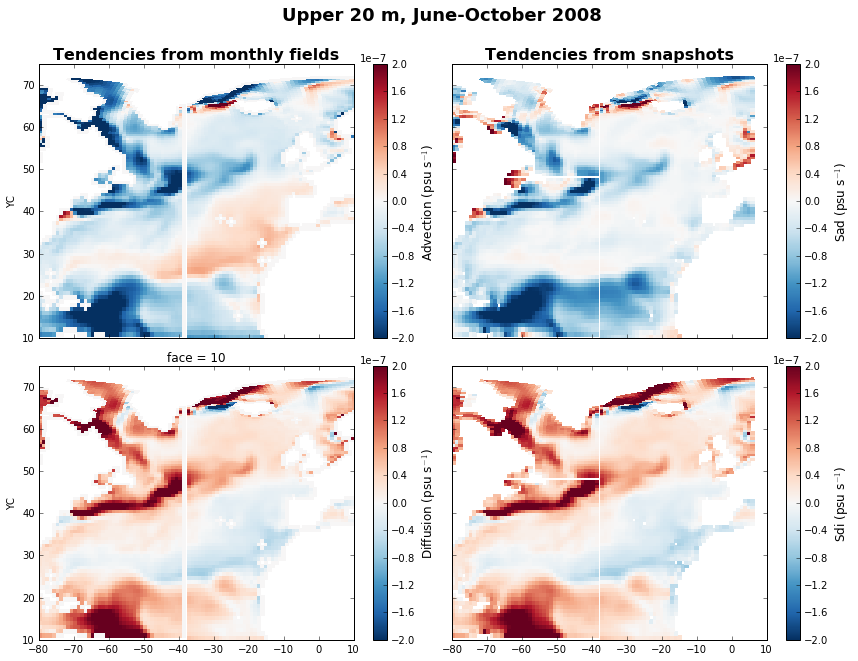

In [22]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(14,10))
f.tight_layout()
f.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.1, wspace=0.05)
f.suptitle('Upper 20 m, June-October 2008', fontsize=18, fontweight='bold')

p = Sad_mon.mean('time')[2].plot(x='XC', y='YC', ax=ax1, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sad_mon.mean('time')[10].plot(x='XC', y='YC', ax=ax1, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
ax1.set_xlim((-80,10))
ax1.set_ylim((10,75))
ax1.set_xlabel('')
ax1.set_title('Tendencies from monthly fields',fontsize=16,fontweight='bold')
cbar = f.colorbar(p, ax=ax1, ticks=1e-7 * np.linspace(-2,2,11))
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
cbar.set_label(r'Advection (psu s$^{-1}$)', fontsize=12)

p = Sad_ten[41].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sad_ten[5].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sad_ten[43].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sad_ten[4].plot(x='lon', y='lat', ax=ax2, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
ax2.set_xlim((-80,10))
ax2.set_ylim((10,75))
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('Tendencies from snapshots',fontsize=16,fontweight='bold')
cbar = f.colorbar(p, ax=ax2)
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
cbar.set_label(r'Sad (psu s$^{-1}$)', fontsize=12)

p = Sdi_mon.mean('time')[2].plot(x='XC', y='YC', ax=ax3, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sdi_mon.mean('time')[10].plot(x='XC', y='YC', ax=ax3, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
ax3.set_xlim((-80,10))
ax3.set_ylim((10,75))
ax3.set_xlabel('')
cbar = f.colorbar(p, ax=ax3)
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
cbar.set_label(r'Diffusion (psu s$^{-1}$)', fontsize=12)

p = Sdi_ten[41].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sdi_ten[5].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sdi_ten[43].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
Sdi_ten[4].plot(x='lon', y='lat', ax=ax4, add_colorbar=False,vmin=-2e-7,vmax=2e-7,cmap='RdBu_r')
ax4.set_xlim((-80,10))
ax4.set_ylim((10,75))
ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.set_title('')
cbar = f.colorbar(p, ax=ax4)
cbar.formatter.set_powerlimits((0, 0))
cbar.update_ticks()
cbar.set_label(r'Sdi (psu s$^{-1}$)', fontsize=12)

plt.savefig('/home/tesdal/tendencies_comparison.png')
plt.show()

### Verical profiles

In [23]:
tstart = '2008-06-01'
tend = '2008-10-31'

face_nr_ten = 42
face_nr_mon = 10

In [24]:
# Lat-lon box in the Labrador Sea
north = 64
south = 55
west = -62
east = -47

In [25]:
Sad_ten = ds_ten.Sad.sel(time=slice(tstart,tend),face=face_nr_ten).mean('time')
Sdi_ten = ds_ten.Sdi.sel(time=slice(tstart,tend),face=face_nr_ten).mean('time')
vol_ten = ds_ten.vol.sel(face=face_nr_ten)

In [26]:
Sad_mon = div_adv.sel(time=slice(tstart,tend),face=face_nr_mon).mean('time')
Sdi_mon = div_diff.sel(time=slice(tstart,tend),face=face_nr_mon).mean('time')
vol_mon = ds_mon.vol.sel(face=face_nr_mon)

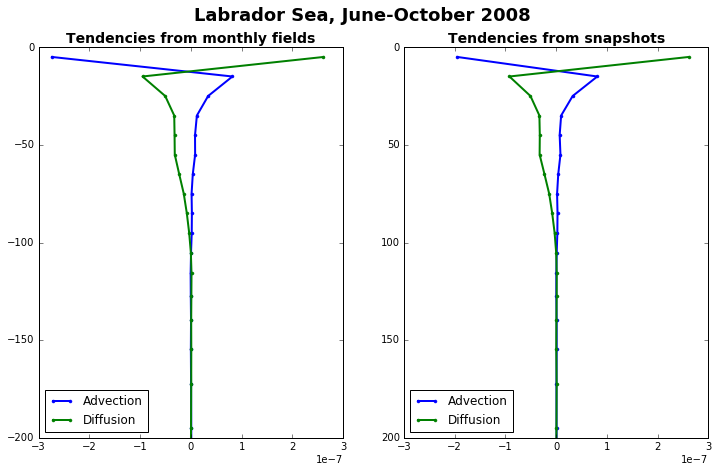

In [27]:
f, axes = plt.subplots(1, 2, sharey=True, figsize=(12,7))
f.suptitle('Labrador Sea, June-October 2008', fontsize=18, fontweight='bold')

plt.subplot(1, 2, 1)
for var in (Sad_mon,Sdi_mon):
    var_reg = var.where((var.XC>west)&(var.XC<east)&(var.YC>south)&(var.YC<north))
    var_sum = var_reg.sum(dim=['i3', 'i4'])
    vol_sum = ((var_reg/var_reg)*vol_mon.where((vol_mon.XC>west)&\
                                               (vol_mon.XC<east)&\
                                               (vol_mon.YC>south)&\
                                               (vol_mon.YC<north))).sum(dim=['i3', 'i4'])
    plt.plot(var_sum/vol_sum, var_sum.RC,lw=2,marker='.')
    
plt.ylim([-200,0])
plt.xlim([-3e-7,3e-7])
plt.legend(['Advection', 'Diffusion'],loc='lower left')
plt.title('Tendencies from monthly fields',fontsize=14,fontweight='bold')

plt.subplot(1, 2, 2)
for var in (Sad_ten, Sdi_ten):
    var_reg = var.where((var.lon>west)&(var.lon<east)&(var.lat>south)&(var.lat<north))
    vol_reg = vol_ten.where((vol_ten.lon>west)&(vol_ten.lon<east)&(vol_ten.lat>south)&(vol_ten.lat<north))
    var_sum = (var_reg*vol_reg).sum(dim=['i3', 'i4'])
    var_mean = var_sum/vol_reg.sum(dim=['i3', 'i4'])
    plt.plot(var_mean.values, var_mean.depth,lw=2,marker='.')

plt.ylim([0,200])
plt.xlim([-3e-7,3e-7])
plt.gca().invert_yaxis()
plt.legend(['Advection', 'Diffusion'],loc='lower left')
plt.title('Tendencies from snapshots',fontsize=14,fontweight='bold')

plt.savefig('/home/tesdal/tendencies_comparison_profile.png')
plt.show()